# Tutorial de Matplotlib: 2. Interfaz Avanzada (Orientada a Objetos)

Creado, traducido y adaptado por [Pedro González Rodelas](https://www.ugr.es/~prodelas/) a partir de un notebook incluido en el siguiente [Tutorial de Matplotlib de astroML](http://jakevdp.github.io/mpl_tutorial/index.html)

                 Última revisión: 09/04/2020

En la sección previa de este tutorial se ha introducido el interfaz de gráficos estilo MATLAB usando el entorno ``pylab`` o bien `pyplot`. Ahora presentaremos otra interfaz algo más complicada, que también proporciona el módulo `matplotlb`, y que resulta ser mucho más potente y versátil a largo plazo. Este enfoque orientado a objetos suele ser la API (Interfaz de Programación de la Aplicación) recomendada en la mayoría de los posibles escenarios de visualización de datos.

En este caso, discutiremos también la generación de gráficos multi-panel usando los comandos [`subplot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html) y  [`subplots`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html) o bien [`GridSpec`](https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html), que también pueden añadirse a cualquier figura partir de `add_subplot`, `add_subplots` o `add_gridspec`.

## Entre bastidores: Figure y Axes

Cada vez que usamos [``pylab.plot``](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)  hay ciertas cosas que ocurren internamente:

- `matplotlib` crea una instancia del objeto [``Figure``](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html), que es uno de los objetos especiales que servirán para describir la ventana de gráficos, así como sus propiedades, conteniendo una lista con todos los elementos que acabarán definiéndolo
- `matplotlib` también crea un elemento [``Axes``](https://matplotlib.org/api/axes_api.html) (o con `add_axes`) dentro de este lienzo en blanco que acabarán configurando la figura final.  Uno de estos ejes puede verse como una ventana gráfica en la que se van a colocar las correspondientes ejes coordenados ``x`` e ``y`` de nuestra representación gráfica. Así pues, ahora vamos a repetir alguno de los ejemplos previos, excepto que ahora tendremos especificar estas instancias ``Figure`` y ``Axes`` explícitamente:

  Necesitaremos importar también la interfaz ``pyplot``de la manera habitual, en modo `inline`:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.isinteractive()    # comprobaremos también si estamos en modo interactivo

True

Ahora crearemos nuestra propia figura y ejes de gráfico, mediante los comandos `figure` y `axes` o `add_axes`:

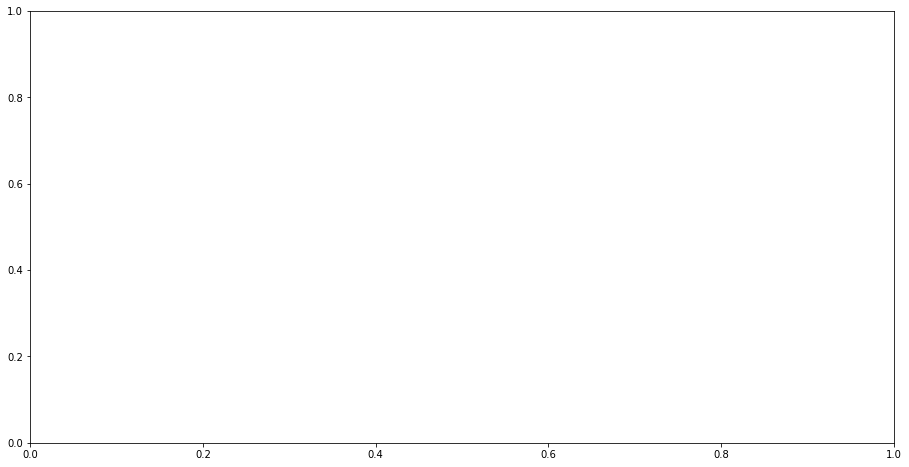

In [6]:
# Primero generaremos una nueva figura de un determinado tamaño
fig = plt.figure(figsize=(6,3))    # aunque figsize podría omitirse
ax = fig.add_axes([0.1,0.1,2,2]) # y le añadimos unos ejes y le indicamos
# cuatro parámetros con la posición de los ejes y la anchura y altura 
# correspondientes para poder dibujar posteriormente las gráficas que queramos

In [7]:
fig, ax   ## Vemos como ambos son objetos de Python

(<Figure size 432x216 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1ed82b06a88>)

Como vemos, de esta manera se crea un lienzo en blanco, con unos ejes coordenados que posteriormente rellenaremos dibujando algo en él, usando por ejemplo una orden ``plot`` tal y cómo hicimos en ocasiones anteriores, exceptuando que ahora deberemos aplicar el método ``plot`` a la instanciación concreta del objeto ``axes`` que hayamos creado:

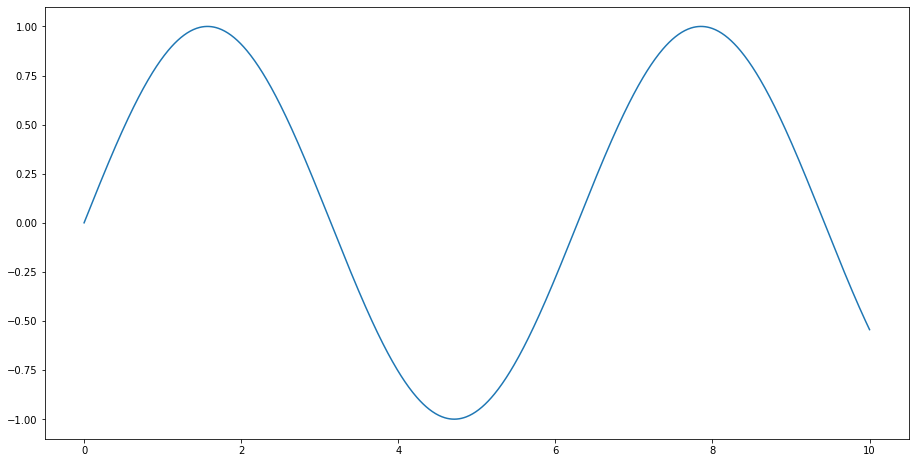

In [8]:
x = np.linspace(0, 10, 1000)
y = np.sin(x)

ax.plot(x, y)
# plt.show()
display(fig)  # para mostrar la figura que acabamos de componer

Empezamos viendo pues alguna de las ventajas de esta nueva interfaz: que esta figura permanece abierta para poder seguir usando comandos de Python, fundamentalmente del módulo `pyplot` de `matplotlib`.

Veámos explícitamente cómo añadir la gráfica de la función coseno a la gráfica anterior:

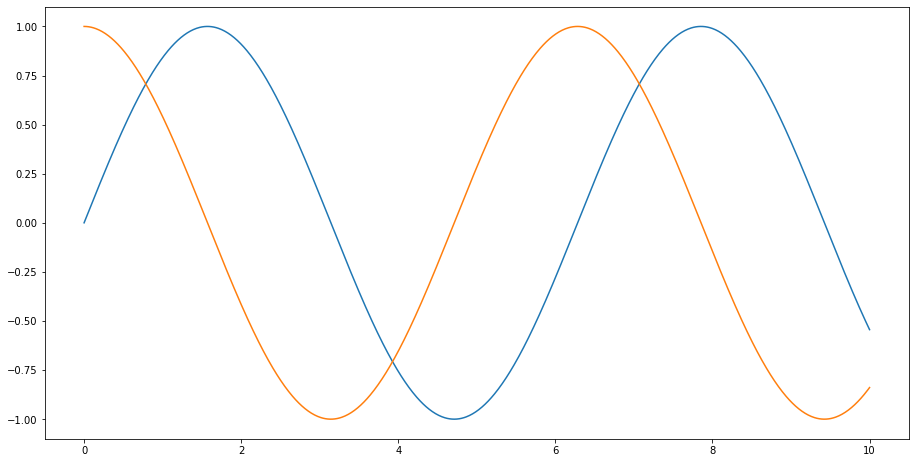

In [9]:
y2 = np.cos(x)
ax.plot(x, y2)

fig  # esto funciona de manera similar a display(fig)

Podemos ahora fijar los límites de estos ejes en concreto, usando ``ax.set_xlim`` o ``ax.set_ylim``:

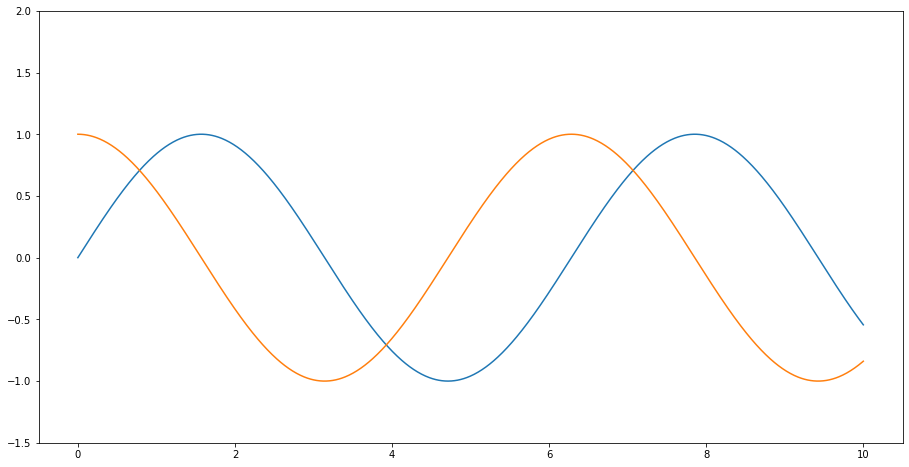

In [10]:
ax.set_ylim(-1.5, 2.0)
fig  #  equivalente a display(fig)

Y, como antes, también podremos añadir una leyenda o marca:

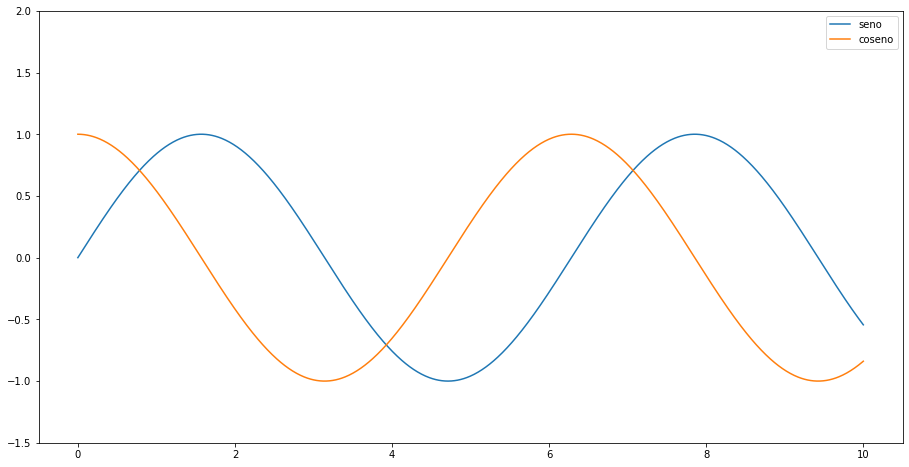

In [11]:
ax.legend(['seno', 'coseno'])
fig  #  equivalente a display(fig)

Nótese que en este caso, no se etiquetan las líneas cuando se dibujan por primera vez, sino que no se hace hasta que se usa el comando ``legend()`` con  una lista de etiquetas.

También podríamos realizar anotaciones en el gráfico de manera similar usando los métodos al estilo ``set_*``.

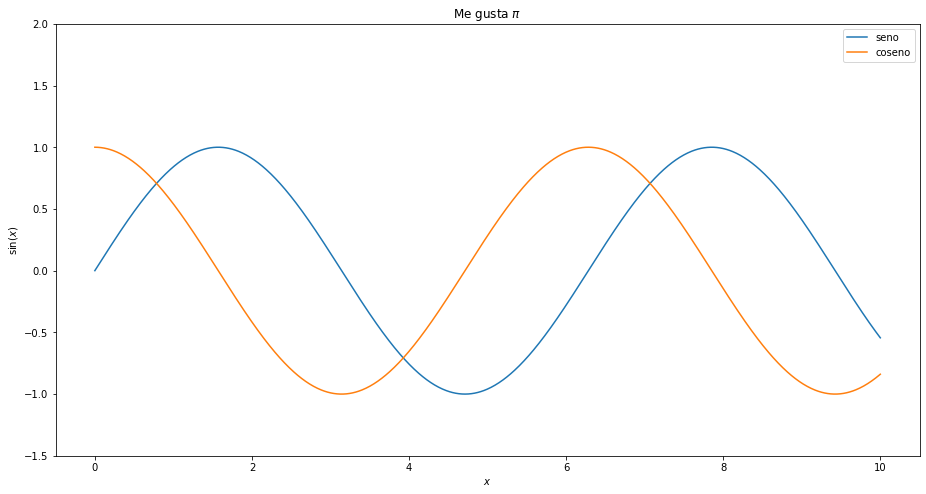

In [12]:
ax.set_xlabel("$x$")
ax.set_ylabel("$\sin(x)$")
ax.set_title("Me gusta $\pi$")

fig  #  equivalente a display(fig)

## Figuras multi-panel: Subplots

Hasta ahora hemos evitado el uso de un nuevo comando: ``fig.add_subplot``.  Este comando nos permitirá crear un grid de paneles gráficos, que luego podrán contener cualquier tipo de gráfico.  Esta interfaz multi-panel es invocado de la siguiente forma

      fig.add_subplot(rows, cols, axnum)

En este caso ``rows`` indica el número de filas del grid, ``cols`` el número de columnas, y ``axnum`` la identificación del subgráfico (subplot) a crear: contando siempre en todo caso de izquierda a derecha, de arriba a abajo y empezando a contar a partir de 1 (detalle heredado del equivalente comando de MATLAB).

Por ejemplo:

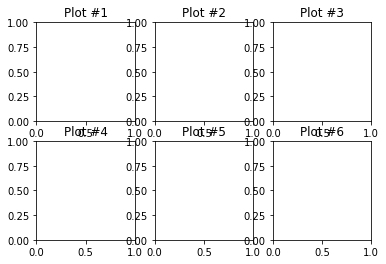

In [35]:
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1 ) # nótese el índice i+1
    ax.set_title("Plot #%i" % int(i+1))

In [55]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [64]:
i = 4
ax = fig.add_subplot(2, 3, i+1) # nótese el índice i+1
ax.set_title("Gráfico #%i" % int(i+1))

Text(0.5, 1.0, 'Gráfico #5')

In [66]:
fig.axes

Nótese que, aunque se han numerado los gráficos a partir de 1, para hacerlo lo más compatible posible con MATLAB, en realidad internamente dichas ventanas de gráficos se han ido numerando dentro del objeto de la clase `axes` de la manera habitual en Python, desde `axes[0]` hasta `axes[5]`.

In [69]:
fig.axes[0], fig.axes[5]   # ¡si le pidiéramos la posición 6 nos daría error!

(<matplotlib.axes._subplots.AxesSubplot at 0x1ed838ef308>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ed849f90c8>)

Detectamos también inmediatamente un pequeño problema: nuestras etiquetas se superponen. Hay varias maneras de solucionar esto, pero una de ellas consiste en usar el comando ``subplots_adjust``, que podrá ajustar tanto la anchura entre cada uno de los gráficos (con el valor dado al parámetro ``wspace``), como la altura entre ellos (con el valor de ``hspace``) como fracción del tamaño de los gráficos:

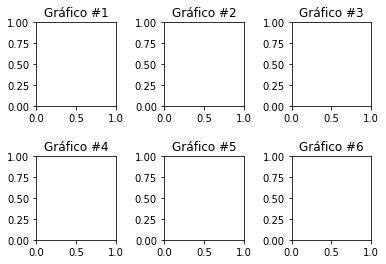

In [70]:
fig.subplots_adjust(wspace=0.6, hspace=0.6)
fig

Ahora ya podríamos representar cualquier cosa dentro de cada una de estos elementos gráficos. Por ejemplo:

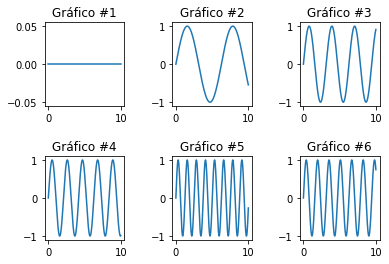

In [71]:
x = np.linspace(0, 10, 1000)
for i in range(6):
    fig.axes[i].plot(x, np.sin(i * x))
    
fig

## Generando subgráficas de manera pythonica: plt.subplots()

En la versión de Matplotlib 1.0 (Junio de 2010) se añadió otro interfaz de subgráficos aún más conveniente,
``plt.subplots``, que permite automatizar la creación de la figura y los subgráficos correspondientes.

En primer lugar crearemos una simple figura con sus ejes correspondientes:

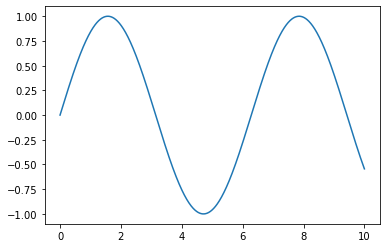

In [72]:
# crea una simple figura con sus ejes
fig, ax = plt.subplots()

ax.plot(x, np.sin(x));

También podremos crear múltiples subfiguras y dibujar en ellas distintas gráficas, como antes:

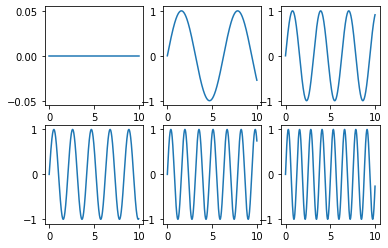

In [73]:
fig, ax = plt.subplots(2, 3)  # grid 2x3 
# en este caso generaremos ahora gráficos que dependan de dos índices
for i in range(2):       # i para las filas
    for j in range(3):   # j para las columnas
        ax[i, j].plot(x, np.sin((3 * i + j) * x))

En este caso, sabemos que todas estas gráficas tienen el mismo rango en ``x``
y el mismo rango en ``y``, por lo que sería adecuado quitar aquellas etiquetas
y marcas innecesarias, cosa que puede llevarse a cabo especificando las opciones
``sharex`` o ``sharey``:

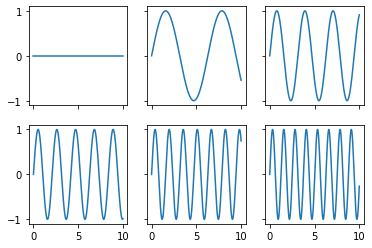

In [74]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)  # 2x3 grid

for i in range(2):
    for j in range(3):
        ax[i, j].plot(x, np.sin((3 * i + j) * x))

## Disposiciones gráficas algo más complicadas: GridSpec

A veces necesitaremos disposiciones gráficas y subfiguras algo más complicadas.  
Matplotlib también posee el módulo ``gridspec``, que ofrece una gran flexibilidad 
para la creación de múltiples ejes abarcando varias filas y/o columnas, usando los habituales índices rebanados, lo mismo que en cualquier lista o array; veámos un ejemplo:

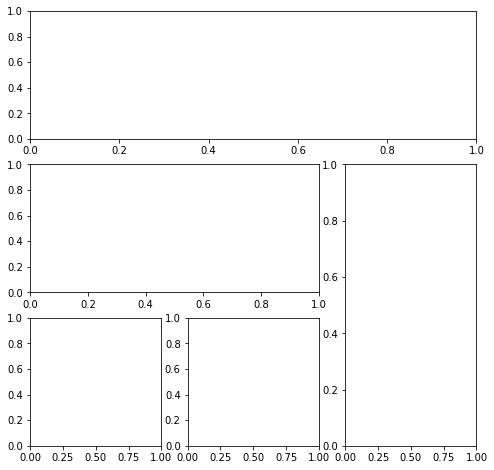

In [79]:
fig = plt.figure(figsize=(8, 8))
gs = plt.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])  # primera fila (0), abarcando todas las columnas
ax2 = fig.add_subplot(gs[1, :2]) # segunda fila (1), abarcando las dos primeras columnas (0 y 1)  
ax3 = fig.add_subplot(gs[1:, 2]) # segunda fila hasta el final (1:), abarcando la tercera columna (2)
ax4 = fig.add_subplot(gs[2, 0])  # tercera fila (2), abarcando sólo la primera columna (0)
ax5 = fig.add_subplot(gs[2, 1])  # tercera fila (2), abarcando sólo la segunda columna (1)

Ahora ya tan sólo quedaría rellenar cada uno de estos lienzos en blanco, con el gráfico que queramos, sin más que referirnos a cada uno de ellos con el nombre que le hemos puesto al generarlos `ax1` hasta `ax5`.

Para ello, en este caso, en vez de ir introduciendo uno a uno dichos ejes y los correspondientes `plot`, vamos más bien a hacer un uso avanzado de la función `eval`, que permite pasarle un string con código Python para que el intérprete lo evalúe como si lo hubiésemos escrito nosotros, salvo que en este caso ha sido generado dentro del bucle, para cada valor del entero `i`, usando también aquí mismo el formateo habitual en otros lenguajes como C o Fortran:  `%d` para dígitos numéricos, que se irán sustituyendo por el valor que tenga la variable `i` en cada momento. Veámos esto más detenidamente corriendo primero un bucle del mismo tipo, pero con un `print` en lugar de `eval`.

In [77]:
for i in range(1,6):
    print("ax"+str(i)+".plot(x, np.sin(%d * x))" % i)                              

ax1.plot(x, np.sin(1 * x))
ax2.plot(x, np.sin(2 * x))
ax3.plot(x, np.sin(3 * x))
ax4.plot(x, np.sin(4 * x))
ax5.plot(x, np.sin(5 * x))


In [19]:
?eval

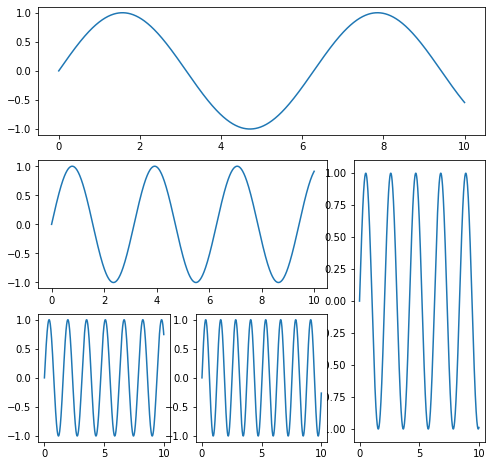

In [80]:
x = np.linspace(0, 10, 1000)
for i in range(1,6):
    eval("ax"+str(i)+".plot(x, np.sin(%d * x))" % i)                           
    
fig

Y esto es todo, ¡espero que atisbe ahora muchas de las posibilidades que brinda el uso más avanzado de esta interfaz Orientada a Objetos del módulo Matplotlib!